# Práctica 2 Detección de puntos relevantes y construcciín de panoramas 

Autor: Blanca Cano Camarero 
Fecha: Noviembre 2021 


In [4]:
'''
Ejecute esta celda. 
Salvo tener la necesidad de cambiar la ruta donde se leen las imágenes, no es necesario la lectura de ésta
celda, ya que contiene: 
1. Bibliotecas necesarias.
2. Indicación de la ruta de donde se toman las imágenes y la lectura de las imágenes.
3. Conjunto de funciones auxiliaras como las utilizadas para mostrar imágenes en pantalla. 
Éstas están tomadas de las prácticas 0 y 1 con a lo sumo tienen ligeras modificaciones.  
'''
# Import básicos
# Configuración previa 
# 1 modulos utilizados
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Funciones auxiliares necesarias de otras prácticas
# ___ Lectura de imágenes___
# path carpeta con imágenes
path = 'imagenes/'

# Devuelve si una imagen está en blanco o negro 
def IsGreyScale(img):
    '''Devuelve si una imagen está en blanco y negro'''
    return len(img.shape) == 2

# Reutilizamos código de la práctica inicial
def ReadImage(filename, flagColor):
  '''
  @param filename: nombre de la foto 
  @para flagColor: boolean escala de grises o color
  '''
  return np.asarray(cv.imread(filename, flagColor), dtype=float)
## Flags
flagColor = cv.IMREAD_ANYCOLOR
flagGrey = cv.IMREAD_GRAYSCALE




# Devuelve si una imagen está en blanco o negro 
def IsGreyScale(img):
    '''Devuelve si una imagen está en blanco y negro'''
    return len(img.shape) == 2

# Para pintar imágenes
def Normalize (img):
    ''' Transforma una imagen de números reales
    al intervalo [0,1] 
    '''
    min = np.min(img)
    max = np.max(img)

    normalized_img = np.copy(img)

    if max - min > 0:
        normalized_img = (normalized_img - min) / (max - min)
    else: 
        normalized_img *= 0 # suponemos todo blanca
    return normalized_img

def PrintOneImage( img, title=None, normalize= True, size = (13,13)):
    '''Muestra una imagen usando imshow'''

    plt.figure(figsize=size)
    if normalize:
        img = Normalize(img)
    if IsGreyScale(img):
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img[:,:,::-1])
    if title:
        plt.title(title)
    plt.show()

def RangoK (k: int):
    ''' dato k >= 0 devuelve [-k, -k+1, ...k-1, k]'''
    return list(range(-k, k+1))
def SacaRangoMascara(m):
    ''' Dada una máscata m, deduce su rango centrado
        Función auxiliar para representar máscaras
    '''
    return RangoK( (len(m)-1) // 2)
    
# Función para mostrar una máscara 
def MuestreaMascara( mascara:list, title = None,color= '--o'):
    dominio = RangoK((len(mascara)-1)//2)
    plt.plot(dominio, mascara, color)
    if (title):
        plt.title( title)
    plt.show()

# Función para comparar máscaras usando la norma euclídea
def DistanciaEuclidea (m1:np.array, m2:np.array)->float: 
    return np.linalg.norm(m1-m2)

# Función para mostrar dos máscaras 
### Comparamos las máscaras   
def MuestraDosMascaras ( m1, m2, title= None, title1 = None, title2 = None):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    if(title):
        fig.suptitle(title)
    # calculamos máscara 1
    r1 = SacaRangoMascara(m1)
    ax1.plot(r1, m1, '--o')
    if(title1):
        ax1.set_title( title1)
    # calculamos máscara 2
    r2 = SacaRangoMascara(m2)
    ax2.plot(r2, m2, '--x')
    if(title2):
        ax2.set_title(title2)
    fig.tight_layout()
    plt.show()

def PrintTwoImages(v_imagenes, v_titulos, titulo_principal):
    '''
    '''
    fig, axs = plt.subplots(1,2, figsize=(15,15))
    for i, img in enumerate(v_imagenes):
        if IsGreyScale(img):
            axs[i].imshow(img, cmap='gray')
        else:
            axs[i].imshow(img[:, :, ::-1])
        axs[i].set_title(v_titulos[i])

    fig.suptitle(titulo_principal)
    fig.tight_layout() # Para que no se solapen los subtítulos
   
    plt.show()
    plt.clf()


def UneImagenes(vim):

    num_imagenes = len(vim)

    alturas = []

    for i in range(0, num_imagenes):
        alturas.append( vim[i].shape[0])

    altura_maxima = np.max( alturas )

    # cogemos la primera imagen normalizada
    imagen_final = Normalize(vim[0])

    if imagen_final.shape[0] < altura_maxima:
        filas_restantes = altura_maxima - vim[0].shape[0]
        franja_negra = np.ones( (filas_restantes, vim[0].shape[1]))
        franja_negra = Normalize(franja_negra)
        imagen_final = np.vstack((imagen_final, franja_negra ))


    for i in range(1, num_imagenes):
        # para las siguientes imagenes, las normalizamos
        img = Normalize(vim[i])

        # si les faltan filas, añadimos las restantes como un borde negro
        if img.shape[0] < altura_maxima:
            filas_restantes = altura_maxima - img.shape[0]
            franja_negra = np.ones( (filas_restantes, img.shape[1]))
            franja_negra = Normalize(franja_negra)
            img = np.vstack((img, franja_negra ))

        imagen_final = np.hstack((imagen_final, img))

    return imagen_final

def PrintMultiplesImagenes(imagenes, titulo=None):
    """ Pinta múltiples imágenes"""
    fusion = UneImagenes(imagenes)
    PrintOneImage(fusion, titulo)


def PintaMultiplesImagenesConTitulos(v_img:list, titulos: list, columnas :int, filas:int ):
    '''Representa varias imágenes en una misma ventana
    Filas. 
    Debe de ser mayor de dos por dos 
    Suponemos:
        columnas * filas > len(v_img)
    '''
    # Gestionamos columanas y filas 
    numero_imagenes = len(v_img)
    # Preparamos grid
    fig, axs = plt.subplots(columnas, filas)

    for i in range(numero_imagenes):
        # pasamos a tribanda si está en monobanda
        if len(v_img[i].shape) != 3: 
            v_img[i] = cv.cvtColor(v_img[i], cv.COLOR_GRAY2RGB)
        # Calculamos posición en el grid
        x = i % columnas
        y = i // filas
        axs[x,y].imshow(v_img[i][:,:,::-1])
        
        # Añadimos título si lo tiene  
        if type(titulos)==list and len(titulos)>i:
            axs[x,y].set_title(titulos[i])
            
    fig.tight_layout() # Para que no se solapen los subtítulos
   
    plt.show()
    plt.clf()


## Apartado primero  

1.- (4 puntos) Extracción de regiones relevantes en un espacio de escalas.
Este punto se centra en detectar KeyPoints sobre cada una de las imágenes
de Yosemite.rar (usar versiones en rango de gris) y dibujarlos sobre las
imágenes haciendo uso de la función drawKeyPoints(). Para ello, se ha de
construir un Espacio de Escalas (pirámide) de Lowe con cuatro octavas en
total y tres escalas dentro de cada octava. Suponer que la imagen original está
afectada por un alisamiento debido a la captura de 𝜎 = 0.8 y queremos
introducir una primera octava de índice-0 de manera que la imagen semilla (
𝑣 01 ) en el espacio de escalas tenga un $\sigma=1.6$.

[] a)  ¿Qué operaciones sobre la imagen original de 𝜎 =0.8  nos permite 
fijar una  imagen semilla de 𝜎 = 1.6 ?   

Bastará con hacer interpolación para duplicar el tamaño de la imagen. 

TODO Justificación teórica. 


[] b)  Implementar una función que calcule las escalas de cualquier octava 
de la forma más eficiente posible. Es decir, reusable para cualquier 
escala.  



### Sobre la construcción del método de SIFT 

#### Documentación  
-  Diapositivas de teoría. 
- Artículo **Anatomy of the SIFT Method** de Ives Rey-Otero y Mauricio Delbracio. 
 http://dx.doi.org/10.5201/ipol.2014.82

#### Descripción general del algoritmo  

El método SIFT es un extractor e descriptores de la imagen invariante a traslaciones, rotaciones y escalado. 

El algoritmo consiste en dos procesos independientes: La detección de puntos de interés y extracción de descriptores de cada uno de ellos. Nos centraremos en el primero de los procesos en este apartado. 

##### Pasos del algoritmo 

1. Cálculo del espacio de escalas Gaussiano. 
2. Cálculo de las diferencias Gaussianas. 
3. Búsqueda de los puntos candidatos de interés. 

Los parámetros involucrados en la práctica son: 
- $\sigma_ {min} = 0.8$ inicial. 
- $n_{spo} = 3$ Numero de escalas por octava.
- $n_{oct} = 3$ Numero de octavas.


Para calcular las sucesivas imágenes 
##### Construcción de 1, cálculo del espacio de escalas Gaussiano  

Para ello se ha implementado la función auxiliar requisito 1B. 

Esta función consta de los siguientes parámetros: 
- Añadiremos además a cada octava tres nuevas imágenes $v_0^o$, $v_{n_{spo}}^o$, $v_{n_{spo}+ 2}$. 

Donde denotamos por $v$ al espacio de escalas construido, $v^o_i$ es la imagen i-ésima de la octava $o$. 

Para calcular cada escala 

$$V_s^o = G_ {\rho_[(s-1) \rightarrow s]} V^o_ {s-1},$$
donde 
$$\rho_[(s-1) \rightarrow s] = \frac{\sigma_{min}}{\delta_{min}} \sqrt{ 2^{ \frac{2s}{n_nspo}} - 2^{ \frac{2(s-1)}{n_nspo}}   }$$


###### Funciones auxiliares  

Reutilizaremos de la práctica primera la función de convolución y la de Gaussian Blur. 


In [6]:
# Funciones auxiliares de la práctica primera 

# Convolución 1D
def Convolve1DNotExpansive( row:np.array , _dx:np.array)-> np.array:
    ''' Convolution without adding padding'''
    dx = _dx[::-1]
    mask_len = len(dx)
    convolved = [ 
        np.dot( row[i:mask_len+i], dx)
        for i in range( len(row)-mask_len+1)
    ]
    return np.array(convolved)
    
# Implementación de convolución 2D en un canal
def ConvolveSeparableOneChannel(bordered_image, dx, dy):
    '''Suponemos imagen monobanda, 
        dx, dy máscaras en respectivos ejes en los que aplicar convolución 
    '''
    # convolve horizontal
    horizontal_convolved = np.array([Convolve1DNotExpansive(row, dx) for row in bordered_image])
    #convolve vertical  
    output = [Convolve1DNotExpansive(column, dy) for column in horizontal_convolved.T]
    return np.array(output).T

# # Implementación de convolución 2D para imagen genérica  
def ConvolveSeparable( image, dx, dy, border_type = cv.BORDER_REFLECT): 
    '''
    Recibe imagen realiza una convolución en 2D 
    '''
    # Calculamos el tamaño de los borderes
    x_padding = int( (len(dx) - 1) /2)
    y_padding =  int( (len(dy) - 1) /2)
    # padding order : top, bottom, left, right 
    bordered_image = cv.copyMakeBorder(image, y_padding, y_padding, x_padding, x_padding,  border_type)
    # controlamos que sea monobanda o tribanda, separando los canales
    if(IsGreyScale(image)):
        out_img = ConvolveSeparableOneChannel(bordered_image, dx, dy)
    else:
        #separamos canales
        channels = cv.split(bordered_image)
        out_img = cv.merge(
            [
                ConvolveSeparableOneChannel(one_channel_image, dx, dy)
                for one_channel_image in channels
            ]
        )
    return out_img

# ___________Para el cálculo de la máscaras Gaussianas_______________

# Declaración de la Gaussiana y su derivada primera y segunda
def Gaussiana (x: float, desviacion_tipica : float) -> float :
    return np.exp( - x**2 /(2* desviacion_tipica**2))

def DerivadaPrimeraGaussiana (x: float, desviacion_tipica : float)->float :
    #return -(Gaussiana (x, desviacion_tipica)* 2*x)
    return Gaussiana (x, desviacion_tipica)* 2*x

# Nota:para la primera derivada se toma sin pérdida de generalidad su versión positiva
# No afecta esta transformación porque su importancia como filtro es de detectar 
# cambios de intensidad, independientemente de que sean, negativos o positivos

def DerivadaSegundaGaussiana (x: float, desviacion_tipica : float)->float:
    return Gaussiana(x, desviacion_tipica) * ( x**2 - desviacion_tipica**2 )


# Implementación de las máscaras
# Comenzaremos definiendo funciones auxiliares: 
# Declaración de las funciones para calcular la máscara de tamaño T
def Mascara( f, size:int ):
    ''' Función auxiliar que devuelve estrictamente la máscara
        Devuelve la máscara de f de tamaño size 
        Requisito: size debe ser impar. 
    '''
    k = (size -1)//2
    return [f(i) for i in range(-k,k+1)]

# Definimos ahora las máscaras de la Gaussiana y sus derivadas, 
# Todavía dependen de la desviación típica y el tamaño de máscara, se generalizarán más adelante.
def MascaraGaussiana( desviacion_tipica:float, size:int)-> list:
    '''Máscara Gaussiana de tamaño "size"
    Requisito size debe ser impar 
    '''
    mascara_sin_normalizar = np.array(
        Mascara(lambda x: Gaussiana(x, desviacion_tipica), size),
        np.float64)
    suma = sum(mascara_sin_normalizar)
    return mascara_sin_normalizar/suma

def MascaraDerivadaPrimera(desviacion_tipica:float , size:int)->list:
    mascara_sin_normalizar =  np.array(
        Mascara(lambda x: DerivadaPrimeraGaussiana(x, desviacion_tipica), size),
        np.float64
    )
    return mascara_sin_normalizar

def MascaraDerivadaSegunda(desviacion_tipica:float , size:int)->list:
    mascara_sin_normalizar =  np.array(
        Mascara(lambda x: DerivadaSegundaGaussiana(x, desviacion_tipica), size),
        np.float64
    )
    return mascara_sin_normalizar

# Para un manejo más cómodo guardaremos la función en la siguiente lista 
MASKS_LIST = [MascaraGaussiana, MascaraDerivadaPrimera,MascaraDerivadaSegunda]

#La funciones creadas dependen de la desviación típica y del tamaño de la máscara. 
#Con el fin de hacerlas menos restrictivas en virtud de la relación T = 2 ceil(3 sigma) +1, 
#despejando T y sigma respectivamente obtenemos

def DeductSizeTFromSigma(sigma:float)-> int:
    ''' Calcula tamaño de másacara a partir de sigma'''
    return int(2* np.ceil(3*sigma) + 1)

def DeductSizeKFromSigma(sigma:float)-> int:
    ''' Calcula tamaño de másacara a partir de sigma'''
    return np.ceil(3*sigma)

def DeductSigmaFromT( T: int) -> float: 
    '''Ojo: se supone que 3 sigma = ceil(3sigma) = (T-1)/2'''
    return (T-1)/6.0

##### Implementación de la función general  que devuelve la máscara 
def MascarasGaussianasGeneral(orden : int, sigma: float =None, T: int = None) ->np.array: 
    '''Devuelve máscara de orden \in {0,1,2}
        Proporcionando sigma o T como dato, en  caso de que uno de ellos no sea dado lo deduce por 
        la relación ya mencionado
    '''
    # comprobación de que se cumplen las hipótesis
    assert 0<= orden <= 2
    assert sigma != None or T != None
    # Deducción pertinentes si son necesarias
    if( T == None):
        T = DeductSizeTFromSigma(sigma)
    elif(sigma == None):
        sigma = DeductSigmaFromT(T)

    return MASKS_LIST[orden](sigma, T)


In [7]:
'''             FUNCIONES EJERCICIO 1.B
    Función cálculo de la desviación de la máscara
    Función cálculo de las escalas de una octava
'''
# Comprobar si sigue una sucesión geométrica y en tal caso volver más eficiente
def Rho ( s, nspo = 3, delta_min = 0.5, sigma_min = 0.8) -> float: 
    '''
    Parámetros: 
    s \in [0,..,nspo+2]  imagen s-ésima
    nspo: número de escalas 
    delta_min: 1/interpolación
    sigma_min: Por defecto de la cámara 
    '''
    return np.float64(
       sigma_min / delta_min * np.sqrt( 2**(2*s/nspo) - 2**(2*(s-1)/nspo))
    )

def CalculaOctava (v_0, nsop = 3, delta_min = 0.5, sigma_min = 0.8): 
    ''' Calcula una octava
    Parámetros: 
    nsop: número de escalas por octavas

    Return: 
    Devuelve lista con las imágenes convolucionadas: [v_0, ..., v_{nsop}, v_{nsop+1}m v_{nsop+2}]
    '''
    octava = [v_0]
    for s in range(1, nsop+3): 
        # Cáculo del sigma
        rho_s = Rho(s, nsop, delta_min, sigma_min)
        # Calculamos máscara pertinente
        G_rho_s = MascarasGaussianasGeneral(0, rho_s)
        # Cálculo de la nueva imagen
        v_s = ConvolveSeparable( octava[-1], G_rho_s, G_rho_s)
        octava.append(v_s)
    return octava
        
    

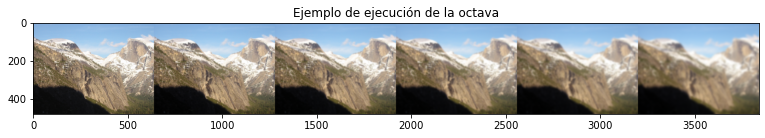

In [9]:
# Comprobación de la ejecución de la función

## leemos imagen 
img_yosemite1 = ReadImage('./yosemite/Yosemite1.jpg', flagColor)
PrintOneImage(img_yosemite1, 'Image yosemite')

octava = CalculaOctava(img_yosemite1)
PrintMultiplesImagenes(octava, 'Ejemplo de ejecución de la octava')


[] c) Usar la función implementada en (b) para calcular las escalas de
todas las octavas (0-3). Mostrar las imágenes calculadas agrupadas
por octava (mostrar solo las escalas 1,2 y 3 en cada octava). 

Para calcular

## Distintos apartados a completar en el ejercicio 1 son

[] a) ¿Qué operaciones sobre la imagen original de 𝜎 = 0.8 nos permite
fijar una imagen semilla de 𝜎 = 1.6 ?  

[] b) Implementar una función que calcule las escalas de cualquier octava
de la forma más eficiente posible. Es decir, reusable para cualquier
escala.

[] c) Usar la función implementada en (b) para calcular las escalas de
todas las octavas (0-3). Mostrar las imágenes calculadas agrupadas
por octava (mostrar solo las escalas 1,2 y 3 en cada octava). 

[] d) Calcular el espacio de escalas Laplaciano a partir de la pirámide e
identificar los 100 extremos locales con mayor respuesta, presentes
en la misma. Extraer en un vector (x,y,$\sigma$) para cada uno de ellos en
los ejes de la imagen original.

[] e) Mostrar la imagen con los extremos locales extraídos usando para
ello un círculo de radio 6x sobre la escala de detección $\sigma$.

[] f) Bonus.- (1 punto) Quién realice este punto usando código propio de
convolución y submuestreo (pirámide de Lowe).